In [3]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

model = ResNet50(weights='imagenet')

img_path = 'data/elephant.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', decode_predictions(preds, top=3)[0])

40960/35363 [==================================] - 0s 1us/step
Predicted: [('n02504458', 'African_elephant', 0.6385877), ('n01871265', 'tusker', 0.27413425), ('n02504013', 'Indian_elephant', 0.07518961)]


In [4]:
preds

array([[2.82450429e-07, 1.00562083e-08, 4.92596364e-08, 2.49676635e-08,
        2.50055034e-08, 4.22032507e-08, 6.60145316e-09, 2.10337760e-07,
        2.16238334e-08, 3.62591563e-05, 1.02416475e-08, 6.66707534e-09,
        6.09187589e-09, 8.21866186e-10, 2.11542339e-09, 1.25158683e-08,
        9.34774302e-09, 3.45390228e-09, 3.91683983e-08, 3.14344040e-09,
        5.55355495e-09, 2.67829336e-07, 1.71971735e-07, 1.75232594e-06,
        1.26450047e-07, 1.76507768e-08, 8.90095020e-09, 3.34022054e-08,
        4.79905582e-09, 8.87668872e-09, 2.69960032e-09, 3.05111758e-09,
        9.57064117e-09, 2.85951046e-07, 8.26240125e-07, 2.37979254e-08,
        1.30146248e-07, 1.77437371e-08, 5.53022943e-08, 1.48428774e-06,
        1.44236028e-08, 4.45329196e-09, 1.13196776e-07, 9.23636378e-07,
        5.22979740e-08, 1.35482617e-06, 9.58788871e-09, 1.02000274e-06,
        3.72540467e-06, 2.56410058e-08, 4.91022334e-08, 7.37701892e-04,
        2.13742712e-08, 5.21620898e-08, 1.46819673e-07, 1.301121

In [10]:
decode_predictions(preds, top=10)

[[('n02504458', 'African_elephant', 0.6385877),
  ('n01871265', 'tusker', 0.27413425),
  ('n02504013', 'Indian_elephant', 0.07518961),
  ('n02437312', 'Arabian_camel', 0.0048482926),
  ('n02412080', 'ram', 0.0013751615),
  ('n02113799', 'standard_poodle', 0.0008410154),
  ('n01704323', 'triceratops', 0.0007377019),
  ('n02410509', 'bison', 0.00042542518),
  ('n02963159', 'cardigan', 0.0003574017),
  ('n02391049', 'zebra', 0.00033633027)]]

In [11]:
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [14]:
model.get_layer(index=-1).activation

<function tensorflow.python.keras.activations.softmax(x, axis=-1)>

--> softmax activation on last layer, returns values in [0,1], where each value is a probability for that class. classes are mutually exclusive (sum of all classes probabilites is 1), so multiple classes cannot be predicted

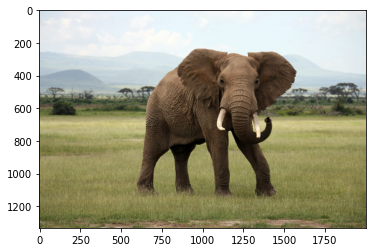

Predicted: [('n02504458', 'African_elephant', 0.6385877), ('n01871265', 'tusker', 0.27413425), ('n02504013', 'Indian_elephant', 0.07518961)]


In [20]:
# Example with Elephant
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np


img = mpimg.imread('data/elephant.jpg')
imgplot = plt.imshow(img)
plt.show()

model = ResNet50(weights='imagenet')

img_path = 'data/elephant.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', decode_predictions(preds, top=3)[0])

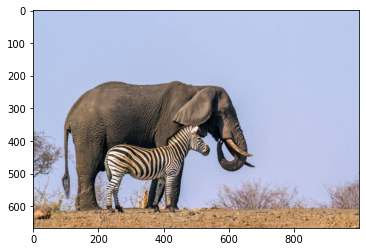

Predicted: [('n02504458', 'African_elephant', 0.78504443), ('n01871265', 'tusker', 0.15822914), ('n02504013', 'Indian_elephant', 0.027066281), ('n02391049', 'zebra', 0.024623971), ('n02437312', 'Arabian_camel', 0.0025071504), ('n01704323', 'triceratops', 0.0012379673), ('n03124170', 'cowboy_hat', 0.00024543647), ('n02422106', 'hartebeest', 0.0001537746), ('n02412080', 'ram', 9.4271105e-05), ('n04370456', 'sweatshirt', 4.691359e-05)]


In [21]:
#Example with Elephant and Zebra
# Example with Elephant
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np


img = mpimg.imread('data/elephant_and_zebra.jpg')
imgplot = plt.imshow(img)
plt.show()

model = ResNet50(weights='imagenet')

img_path = 'data/elephant_and_zebra.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', decode_predictions(preds, top=10)[0])